In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [23]:
df = pd.read_csv('diabetes_final.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Escolhi o StandardScaler porque ele apresentou melhores resultados nos testes. Em dados médicos, valores muito altos (como insulina elevada) não são erros, mas sim sinais da doença. O StandardScaler mantém a importância desses valores extremos, ajudando o SVM a separar melhor os pacientes doentes dos saudáveis. 

Acurácia: 84.84%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       363
           1       0.82      0.71      0.76       191

    accuracy                           0.85       554
   macro avg       0.84      0.82      0.83       554
weighted avg       0.85      0.85      0.85       554



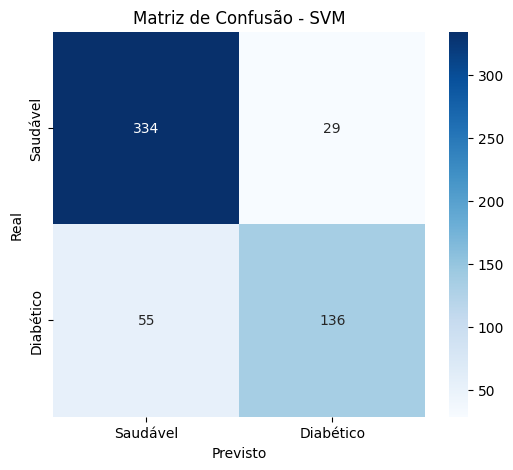

In [24]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Saudável', 'Diabético'],
            yticklabels=['Saudável', 'Diabético'])
plt.title('Matriz de Confusão - SVM')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

O desempenho superior do SVM justifica-se por ser um algoritmo supervisionado. Ao contrário do KMeans, que agrupa dados sem orientação ('às cegas'), o SVM utiliza os rótulos conhecidos (Saudável vs. Diabético) para maximizar a margem de separação entre as classes. Além disso, a aplicação do Kernel RBF foi decisiva: ele permite projetar os dados em dimensões superiores, criando fronteiras de decisão não-lineares (curvas) que lidam eficazmente com a sobreposição complexa dos dados biológicos.